In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from natsort import natsorted
from pathlib import Path
from monolayer_tracking.image_segmentation import segment_stack

# Segmentation

## Load Data
Find the relevant raw data file paths

In [2]:
#-------------MODIFY THESE-------------
dataset="20240310 FUCCI halo sorted col_glass low_density" # name of the dataset folder
stack_format="membrane-stage_*.tif" # how the stacks are named within the dataset folder
segmentation_channel="membrane" # 'membrane' or 'nuclei' or 'ZO-1'
#--------------------------------------

stacks_location=f"F:/my_data/Data/{dataset}/" # path to the dataset folder
files=natsorted(glob(stacks_location+stack_format))
len(files)

20

In [9]:
# load FUCCI
dataset="20240311 FUCCI halo sorted col_glass high_density"
stack_format='membrane-stage_*.tif'
PIP_format='PIP-stage_*.tif'
geminin_format='geminin-stage_*.tif'
stacks_location=f'F:/my_data/Data/{dataset}/'
files=[[natsorted(glob(stacks_location+file_format))[-1]] for file_format in [stack_format, PIP_format, geminin_format]]
print([len(f) for f in files])

[1, 1, 1]


In [ ]:
# load FUCCI
dataset="20240311 FUCCI halo sorted col_glass high_density"
stack_format='membrane-stage_*.tif'
PIP_format='PIP-stage_*.tif'
geminin_format='geminin-stage_*.tif'
stacks_location=f'F:/my_data/Data/{dataset}/'
files=[[natsorted(glob(stacks_location+file_format))[-1]] for file_format in [stack_format, PIP_format, geminin_format]]
print([len(f) for f in files])

In [ ]:
root_dir=r'F:\my_data\Data\20240322 FUCCI halo sort1 col_glass colonies/'
membrane_path=root_dir+'/membrane.tif'
geminin_path=root_dir+'/geminin.tif'
pip_path=root_dir+'/PIP.tif'

In [ ]:
stack_folder=r'F:\my_data\Segmentation\20240322 FUCCI halo sort1 col_glass colonies\segmented/'
segment_stack(membrane_path, output_path=stack_folder, segmentation_channel='FUCCI', pip_path=pip_path, geminin_path=geminin_path, color_channels=[2,1], initial_frame_number=0)

  0%|          | 0/116 [00:00<?, ?it/s]

## Segment Data

In [10]:
output_folder=Path(f'F:/my_data/Segmentation/{dataset}/segmented/')
for membrane_path, pip_path, geminin_path in zip(*files):
    print(membrane_path)
    stack_folder=output_folder/Path(membrane_path.replace('membrane', 'FUCCI')).stem
    segment_stack(membrane_path, output_path=stack_folder, segmentation_channel='FUCCI', pip_path=pip_path, geminin_path=geminin_path, color_channels=[2,1], initial_frame_number=0)

F:/my_data/Data/20240311 FUCCI halo sorted col_glass high_density\membrane-stage_20.tif


  0%|          | 0/132 [00:00<?, ?it/s]

In [ ]:
from monolayer_tracking import celltool_parallel as ctp
from tqdm.notebook import tqdm
import pandas as pd

segmented_stages=natsorted(glob('F:/my_data/Data/20240311 FUCCI halo sorted col_glass high_density/Segmentation/*'))

progress=tqdm(segmented_stages)
for stage_dir in progress:
    progress.set_description(Path(stage_dir).stem)
    ctp.export_smoothed_contours(stage_dir, output_path=None, verbose=True, chunk_kwargs=dict(size=100))

In [ ]:
# load pickled smoothed contours
contour_dirs=natsorted(glob('F:/my_data/Data/20240311 FUCCI halo sorted col_glass high_density/Segmentation/contours/*'))
smoothed_contours=pd.read_pickle(contour_dirs[0]+'/smoothed_contours.pkl')
print(len(smoothed_contours))

In [ ]:
# segment membrane
for membrane_path in files:
    print(membrane_path)
    segment_stack(membrane_path)

In [ ]:
reference_contour=ctp.sample_reference_contour(smoothed_contours)
progress=tqdm(contour_dirs)
for contour_dir in progress:
    progress.set_description(Path(stage_dir).stem)
    ctp.export_aligned_contours(contour_dir, reference_contour, chunk_kwargs=dict(size=8))

In [5]:
# segment FUCCI
output_folder=Path(f'F:/my_data/Segmentation/{dataset}/segmented/')
for membrane_path, pip_path, geminin_path in zip(*files):
    print(membrane_path)
    stack_folder=output_folder/Path(membrane_path.replace('membrane', 'FUCCI')).stem
    segment_stack(membrane_path, output_path=stack_folder, segmentation_channel='FUCCI', pip_path=pip_path, geminin_path=geminin_path, color_channels=[2,1])

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_7.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_8.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_9.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_10.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_11.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_12.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_13.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_14.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_15.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_16.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_17.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_18.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_19.tif


  0%|          | 0/122 [00:00<?, ?it/s]

F:/my_data/Data/20240310 FUCCI halo sorted col_glass low_density\membrane-stage_20.tif


  0%|          | 0/122 [00:00<?, ?it/s]

## Verify Segmentation Efficacy

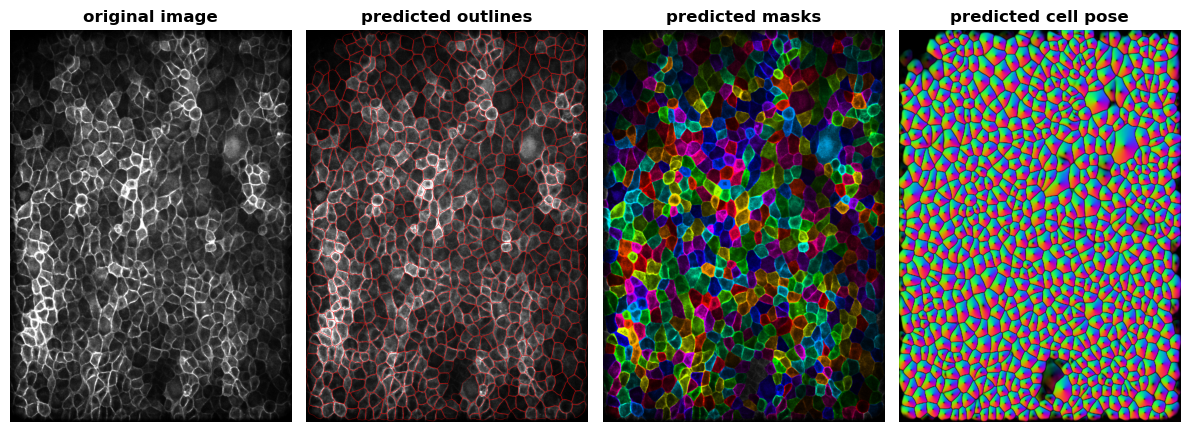

In [17]:
# cyto2 vs my model
from cellpose import plot
stacks_location="Data/20230508 halo glass lines incubator - good glass/"
channels=[0,0]

#stack=io.imread(stacks_location+'stage_1.tif')

#masks, flows, styles = user_cyto.eval(stack[0], diameter=None, channels=channels)

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, stack[0], masks, flows[0], channels=channels)
plt.tight_layout()
#plt.savefig('Plots/Physics 335 Report/segmentation-demo.tif',dpi=300)

#masks, flows, styles, diams = cyto2.eval(stack[0], diameter=None, channels=channels)

#fig = plt.figure(figsize=(12,5))
#plot.show_segmentation(fig, stack[0], masks, flows[0], channels=channels)
#plt.tight_layout()
#plt.show()

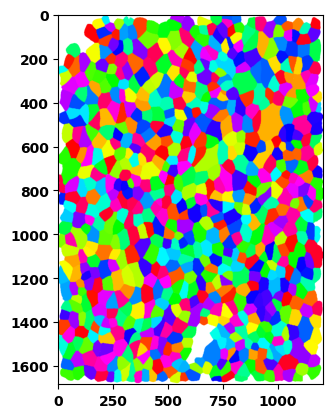

In [20]:
#plt.imshow(plot.mask_rgb(masks))
plt.imshow(stack[0])
plt.imshow(plot.mask_overlay(stack[0], masks))

plt.savefig('Plots/Physics 335 Report/masks.png',dpi=300)
#plt.tight_layout()
#plt.show()

# Train New Model

In [ ]:
# training my own model

from cellpose import models
trainer_model=models.CellposeModel(gpu=True, model_type='cyto2')
stacks_location="C:/Users/Gardel Lab/Desktop/20230728/"
images=[]
labels=[]
for file in glob(stacks_location+'*seg.npy'):
    data=np.load(file, allow_pickle=True).item()
    images.append(data['img'])
    labels.append(data['masks'])

trainer_model.train(images,labels,channels=[0,0],save_path=stacks_location, model_name='20230728_PDMS_cyto2', n_epochs=1000)